## Iris KNN

In [1]:
library(ISLR)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### Scale the data

In [4]:
std.iris <- scale(iris[1:4])
var(std.iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [5]:
final.iris <- cbind(std.iris,iris[5])

### Splitting data

In [6]:
library(caTools)
set.seed(101)
sample <- sample.split(final.iris$Species, SplitRatio=0.7)
train <- subset(final.iris, sample==T)
test <- subset(final.iris, sample==F)

### Building the model

In [17]:
library(class)
predicted.species <- knn(train[1:4], test[1:4], train$Species, k=1)

In [18]:
head(predicted.species)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [19]:
misclassrate <- mean(test$Species != predicted.species)
misclassrate

[1] 0.04444444

#### Choosing K value with Elbow method

In [11]:
predicted.species <- NULL
error.rate <- NULL

for(i in 1:10){
    set.seed(101)
    predicted.species <- knn(train[1:4], test[1:4], train$Species, k=i)
    error.rate[i] <- mean(test$Species != predicted.species)
}

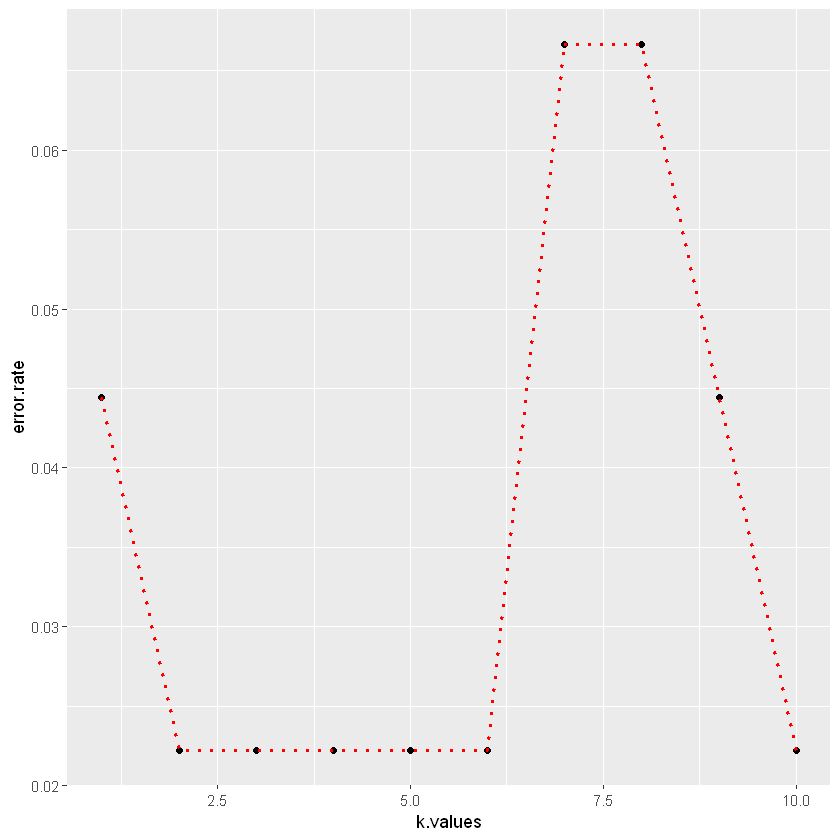

In [13]:
library(ggplot2)

k.values <- 1:10
error.df <- data.frame(error.rate, k.values)

pl1 <- ggplot(error.df, aes(k.values, error.rate)) + geom_point()
pl2 <- pl1 + geom_line(lty='dotted', color='red', size=1)
pl2

#### error rate seems to be lowest for k~2 to 6 

## END!!!